# **Build a  Linear Regression Model in Python**

Task 1 : Implement a linear regression model to predict the prices of houses based on their sq.footage and the number of bedrooms and bathrooms

[*Dataset Link(Click here)*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In this Jupyter notebook, I will build a linear regression model in Python using the scikit-learn package.

### **Import library**


In [1]:
import pandas as pd                  # For data loading and manipulation
import numpy as np                   # For numerical operations
import matplotlib.pyplot as plt      # For plotting
import seaborn as sns                # For statistical visualizations
from sklearn.linear_model import LinearRegression  # Linear model
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.metrics import mean_squared_error, r2_score  # Model evaluation

## **Load the House Prices - Advanced Regression Techniques(via Kaggle)**
The downloaded zip file contains about 4 files:
```
train.csv - the training set
test.csv - the test set
data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

```
We only need `train.csv` to fulfil our purpose here.  
But I think it's good practice to first understand your data.

So let's go through our `description.txt` file:


It defines:

> *   **GrLivArea**: Above grade (ground) living area square feet
> *   **FullBath**: Full bathrooms above grade
> *   **Bedroom**: Bedrooms above grade (does NOT include basement bedrooms)
> *  **SalePrice**: the property's sale price in dollars. This is the target variable that you're trying to predict.
---

*So i am going to edit my train.csv file to only have these relevant fields. After that I will load that csv file into jupyter environment.*

### **Read in CSV file**

In [3]:
House_data = pd.read_csv("train.csv")
House_data

,SqFtArea,Bathroom,Bedroom,SalePrice
0,1710,2,3,208500
1,1262,2,3,181500
2,1786,2,3,223500
3,1717,1,3,140000
4,2198,2,4,250000
...,...,...,...,...
1455,1647,2,3,175000
1456,2073,2,3,210000
1457,2340,2,4,266500
1458,1078,1,2,142125


In [4]:
Y=House_data.SalePrice
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [5]:
X = House_data.drop(['SalePrice'], axis=1)
X

,SqFtArea,Bathroom,Bedroom
0,1710,2,3
1,1262,2,3
2,1786,2,3
3,1717,1,3
4,2198,2,4
...,...,...,...
1455,1647,2,3
1456,2073,2,3
1457,2340,2,4
1458,1078,1,2


In [ ]:
features = ['SqFtArea', 'Bathroom', 'Bedroom']
p = House_data[features]             # Predictor variables
t = House_data['SalePrice']         # Target variable

## **Data split**

#### Perform the 80-20 train-test split

In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2,random_state=42)

Here we have set a parameter random_state=42(could be any no.).This makes our results reproducible. 
Basically think of random_state as this shuffle pattern that ensures same split happens every time I run the code.

### **Data dimension**

In [8]:
X_train.shape, Y_train.shape

((1168, 3), (1168,))

In [9]:
X_val.shape, Y_val.shape

((292, 3), (292,))

### **Build linear regression**

#### Defines the regression model

In [10]:
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Apply trained model to make prediction (on val set)

In [11]:
Y_pred = model.predict(X_val)

## **Prediction results**

### **Print model performance**

In [12]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_val, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_val, Y_pred))

Coefficients: [   104.02630701  30014.32410896 -26655.16535734]
Intercept: 52261.74862694468
Mean squared error (MSE): 2806426667.25
Coefficient of determination (R^2): 0.63


#### **This means**


Y(SalePrice)= 104.02630701(SqFtArea) +30014.32410896(Bathroom) -26655.16535734(Bedroom)+ 52261.74...

<Axes: xlabel='Actual', ylabel='Predicted'>

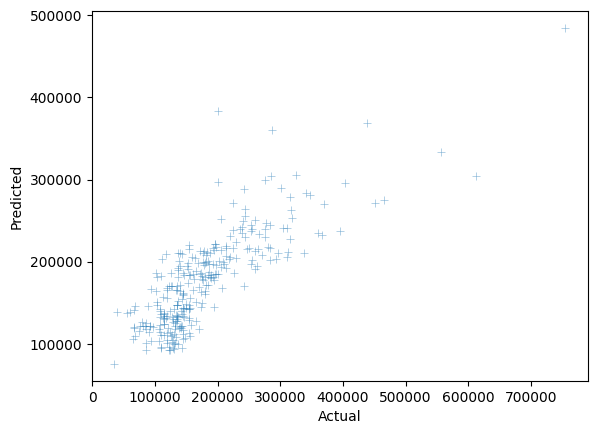

In [13]:
val_results = pd.DataFrame({
    'Actual': Y_val,
    'Predicted': Y_pred
})

# Scatter plot
sns.scatterplot(data=val_results, x='Actual', y='Predicted', marker="+", alpha=0.5)


## **Predictions on Test Set**

#### Load and preprocess the test data

In [14]:
test_data = pd.read_csv("test.csv")
X_test = test_data[features]

#### Predict SalePrice for the test set

In [15]:
test_predictions = model.predict(X_test)

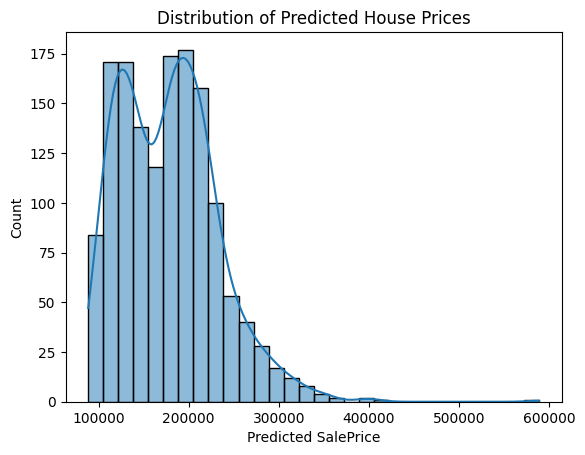

In [17]:
sns.histplot(test_predictions, bins=30, kde=True)
plt.title("Distribution of Predicted House Prices")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Count")
plt.show()

### however let's improve the accuracy of our model by standardizing the features : 

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Let's also do smthng about skewed target variable by **log transforming SalePrice**

In [27]:
y = np.log1p(House_data['SalePrice'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set (still in log scale)
y_val_pred_log = model.predict(X_val)

# Convert predictions back to original SalePrice scale
y_val_pred = np.expm1(y_val_pred_log)
y_val_actual = np.expm1(y_val)

In [35]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_val_actual, y_val_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_val_actual, y_val_pred))


Coefficients: [ 0.25001189  0.10498934 -0.0891137 ]
Intercept: 12.025311172711401
Mean squared error (MSE): 2783648442.39
Coefficient of determination (R^2): 0.64


<Axes: xlabel='Actual', ylabel='Predicted'>

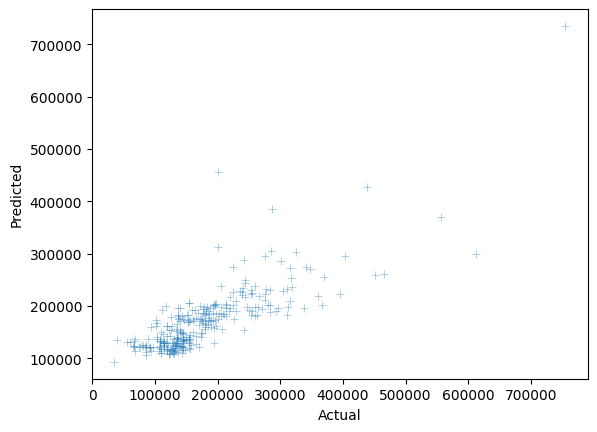

In [36]:
val_df = pd.DataFrame({
    'Actual': y_val_actual,
    'Predicted': y_val_pred
})

# Scatter plot
sns.scatterplot(data=val_df, x='Actual', y='Predicted', alpha=0.5, marker="+")

Thus we do see a slight improvement in R^2 value (This explains the variance in prices of 64% of the houses)


These predictions can be improved by involving more factors on which house prices depend on(as they were in the original data)